<a href="https://colab.research.google.com/github/hakimozcan/Financial-Analysis/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages

In [ ]:
!pip install yfinance

# Import Packages

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Import Data

In [ ]:
coin_1 = "DOGE-USD"

doge_df = yf.download(coin_1, start ="2019-03-14", end="2023-07-24")
doge_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-14,0.002022,0.002044,0.002009,0.002039,0.002039,12675418
2019-03-15,0.002041,0.002058,0.002015,0.002048,0.002048,14469793
2019-03-16,0.002047,0.002099,0.002040,0.002077,0.002077,17262660
2019-03-17,0.002081,0.002090,0.002057,0.002081,0.002081,17683010
2019-03-18,0.002076,0.002094,0.002063,0.002083,0.002083,21958793


In [ ]:
coin_2 = "ATOM-USD"

atom_df = yf.download(coin_2, start ="2019-03-14", end="2023-07-24")
atom_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-14,6.439715,6.639943,6.353963,6.526642,6.526642,7318172
2019-03-15,6.633174,7.715249,6.432468,7.504351,7.504351,6057301
2019-03-16,7.507990,8.305615,6.694531,7.383882,7.383882,3477393
2019-03-17,7.357443,7.357443,4.727895,4.776164,4.776164,2653565
2019-03-18,4.828242,5.229982,4.828242,5.110341,5.110341,2567201


In [ ]:
doge_df.shape

(1593, 6)

In [ ]:
doge_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1593 entries, 2019-03-14 to 2023-07-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1593 non-null   float64
 1   High       1593 non-null   float64
 2   Low        1593 non-null   float64
 3   Close      1593 non-null   float64
 4   Adj Close  1593 non-null   float64
 5   Volume     1593 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 87.1 KB


In [ ]:
doge_df.to_csv("doge_2016_2023.csv")
from google.colab import files
files.download("doge_2016_2023.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
doge_df = pd.read_csv("doge_2016_2023.csv")
doge_df.head(9)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270
5,2017-11-14,0.001201,0.001239,0.001131,0.001184,0.001184,2660340
6,2017-11-15,0.001189,0.001351,0.001179,0.001339,0.001339,2840180
7,2017-11-16,0.001348,0.001424,0.001286,0.001390,0.001390,3423010
8,2017-11-17,0.001381,0.001394,0.001274,0.001313,0.001313,2787480


# EDA

In [ ]:
doge_df.head()  # examine the DOGE DataFrames

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-14,0.002022,0.002044,0.002009,0.002039,0.002039,12675418
2019-03-15,0.002041,0.002058,0.002015,0.002048,0.002048,14469793
2019-03-16,0.002047,0.002099,0.002040,0.002077,0.002077,17262660
2019-03-17,0.002081,0.002090,0.002057,0.002081,0.002081,17683010
2019-03-18,0.002076,0.002094,0.002063,0.002083,0.002083,21958793


In [ ]:
doge_df.shape

(1593, 6)

In [ ]:
atom_df.head()  # examine the ATOM DataFrame

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-14,6.439715,6.639943,6.353963,6.526642,6.526642,7318172
2019-03-15,6.633174,7.715249,6.432468,7.504351,7.504351,6057301
2019-03-16,7.507990,8.305615,6.694531,7.383882,7.383882,3477393
2019-03-17,7.357443,7.357443,4.727895,4.776164,4.776164,2653565
2019-03-18,4.828242,5.229982,4.828242,5.110341,5.110341,2567201


In [ ]:
atom_df.shape

(1593, 6)

In [ ]:
# Plot the Adj_Close columns for DOGE and ATOM
doge_df['Adj Close'].plot(label='DOGE', legend=True, secondary_y=True)
atom_df['Adj Close'].plot(label='ATOM', legend=True)
plt.show()  # show the plot
plt.clf()  # clear the plot space

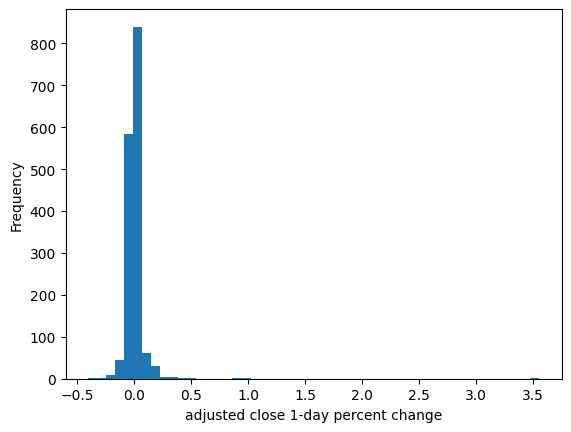

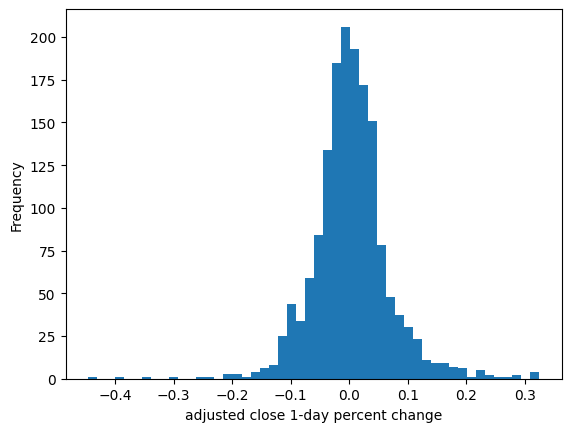

In [ ]:
# Histogram of the daily price change percent of Adj_Close for DOGE
doge_df['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

# Histogram of the daily price change percent of Adj_Close for DOGE
atom_df['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

We can engineer datetime features to add even more information for our non-linear models. Most financial data has datetimes, which have lots of information in them -- year, month, day, and sometimes hour, minute, and second. But we can also get the day of the week, and things like the quarter of the year, or the elapsed time since some event (e.g. earnings reports).


We are only going to get the day of the week here, since our dataset doesn't go back very far in time. The dayofweek property from the pandas datetime index will help us get the day of the week. Then we will dummy dayofweek with pandas' get_dummies(). This creates columns for each day of the week with binary values (0 or 1). We drop the first column because it can be inferred from the others.

In [ ]:
feature_names = ['5d_close_pct',
                 'ma14',
                 'rsi14',
                 'ma30',
                 'rsi30',
                 'ma50',
                 'rsi50',
                 'ma200',
                 'rsi200']

In [ ]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(doge_df.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original dataframe index for merging
days_of_week.index = doge_df.index

# Join the dataframe with the days of week dataframe
doge_df = pd.concat([doge_df, days_of_week], axis=1)

# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
doge_df.dropna(inplace=True)  # drop missing values in-place
doge_df.head()

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2019-03-14  0.002022  0.002044  0.002009  0.002039   0.002039  12675418   
2019-03-15  0.002041  0.002058  0.002015  0.002048   0.002048  14469793   
2019-03-16  0.002047  0.002099  0.002040  0.002077   0.002077  17262660   
2019-03-17  0.002081  0.002090  0.002057  0.002081   0.002081  17683010   
2019-03-18  0.002076  0.002094  0.002063  0.002083   0.002083  21958793   

            weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
Date                                                                          
2019-03-14          0          0          1          0          0          0  
2019-03-15          0          0          0          1          0          0  
2019-03-16          0          0          0          0          1          0  
2019-03-17          0          0          0          0          0          1  


In [ ]:
days_of_week

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
Date,,,,,,
2019-03-14,0,0,1,0,0,0
2019-03-15,0,0,0,1,0,0
2019-03-16,0,0,0,0,1,0
2019-03-17,0,0,0,0,0,1
2019-03-18,0,0,0,0,0,0
...,...,...,...,...,...,...
2023-07-19,0,1,0,0,0,0
2023-07-20,0,0,1,0,0,0
2023-07-21,0,0,0,1,0,0


# Process Data

In [ ]:
import numpy as np
increase = 1
decrease = -1
doge_df['price_change'] = np.where(doge_df['Close'].shift(-1) > doge_df['Close'], increase, decrease)
doge_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,price_change
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,-1
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,1
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,-1
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,1
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,-1


In [ ]:
doge_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,price_change
2078,2023-07-19,0.068589,0.071212,0.068487,0.070159,0.070159,418313611,1
2079,2023-07-20,0.070148,0.071022,0.068487,0.070516,0.070516,574227832,1
2080,2023-07-21,0.070526,0.076391,0.070407,0.073295,0.073295,762216251,-1
2081,2023-07-22,0.073295,0.073295,0.070081,0.070433,0.070433,353000261,1
2082,2023-07-23,0.070435,0.072804,0.070220,0.071819,0.071819,287153173,-1


In [ ]:
doge_df.set_index('Date', inplace=True)
doge_df.index

Index(['2017-11-09', '2017-11-10', '2017-11-11', '2017-11-12', '2017-11-13',
       '2017-11-14', '2017-11-15', '2017-11-16', '2017-11-17', '2017-11-18',
       ...
       '2023-07-14', '2023-07-15', '2023-07-16', '2023-07-17', '2023-07-18',
       '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-22', '2023-07-23'],
      dtype='object', name='Date', length=2083)

In [ ]:
X = doge_df.iloc[:, 1:4] # KNN needs a list
X

,High,Low,Close
Date,,,
2017-11-09,0.001415,0.001181,0.001415
2017-11-10,0.001431,0.001125,0.001163
2017-11-11,0.001257,0.001141,0.001201
2017-11-12,0.001210,0.001002,0.001038
2017-11-13,0.001212,0.001019,0.001211
...,...,...,...
2023-07-19,0.071212,0.068487,0.070159
2023-07-20,0.071022,0.068487,0.070516
2023-07-21,0.076391,0.070407,0.073295


In [ ]:
y = doge_df.iloc[:, 6].values
y

array([-1,  1, -1, ..., -1,  1, -1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# If you use volume, the scaling the data

In [ ]:
X_train.shape

(1666, 3)

In [ ]:
y_train.shape

(1666,)

In [ ]:
X_test.shape

(417, 3)

In [ ]:
y_test.shape

(417,)

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_scaled = standard_scaler.transform(X_train)
X_train_scaled

array([[-0.63266087, -0.66074701, -0.64675207],
       [-0.63999753, -0.66772968, -0.65270908],
       [-0.62491327, -0.65581259, -0.63660469],
       ...,
       [-0.63795289, -0.66492498, -0.65036075],
       [ 2.01450203,  2.1129339 ,  2.17431866],
       [-0.63059618, -0.65752334, -0.64313262]])

In [ ]:
X_test_scaled = standard_scaler.transform(X_test)
X_test_scaled

array([[ 0.71577195,  0.78393327,  0.70908744],
       [-0.62683764, -0.65410183, -0.63959935],
       [ 2.83467508,  2.65023896,  3.00367896],
       ...,
       [ 0.01372735,  0.02559162, -0.00815609],
       [-0.63198934, -0.65862893, -0.6441883 ],
       [ 0.86432945,  0.93688877,  0.86990534]])

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
model_predictions = model.predict(X_test_scaled)
model_predictions

array([-1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
        1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,
        1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,
        1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1,
        1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,
        1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, model_predictions)

In [ ]:
pd.DataFrame(matrix)

,0,1
0,116,89
1,116,96


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_predictions))

              precision    recall  f1-score   support

          -1       0.50      0.57      0.53       205
           1       0.52      0.45      0.48       212

    accuracy                           0.51       417
   macro avg       0.51      0.51      0.51       417
weighted avg       0.51      0.51      0.51       417



In [ ]:
doge_df.index.min()

'2017-11-09'

In [ ]:
k_min = 1
k_max = 30
errors = []
for i in range(k_min, k_max):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train, y_train)
  models_prediction = model.predict(X_test)
  errors.append(np.mean(models_prediction != y_test))


errors

[0.5227817745803357,
 0.5227817745803357,
 0.5011990407673861,
 0.5275779376498801,
 0.5155875299760192,
 0.49160671462829736,
 0.4748201438848921,
 0.5011990407673861,
 0.49160671462829736,
 0.5035971223021583,
 0.5059952038369304,
 0.4940047961630695,
 0.5083932853717026,
 0.5035971223021583,
 0.4988009592326139,
 0.513189448441247,
 0.5083932853717026,
 0.5299760191846523,
 0.4988009592326139,
 0.5059952038369304,
 0.49640287769784175,
 0.5059952038369304,
 0.5059952038369304,
 0.4940047961630695,
 0.4940047961630695,
 0.486810551558753,
 0.5035971223021583,
 0.4940047961630695,
 0.49640287769784175]

Text(0, 0.5, 'Error')

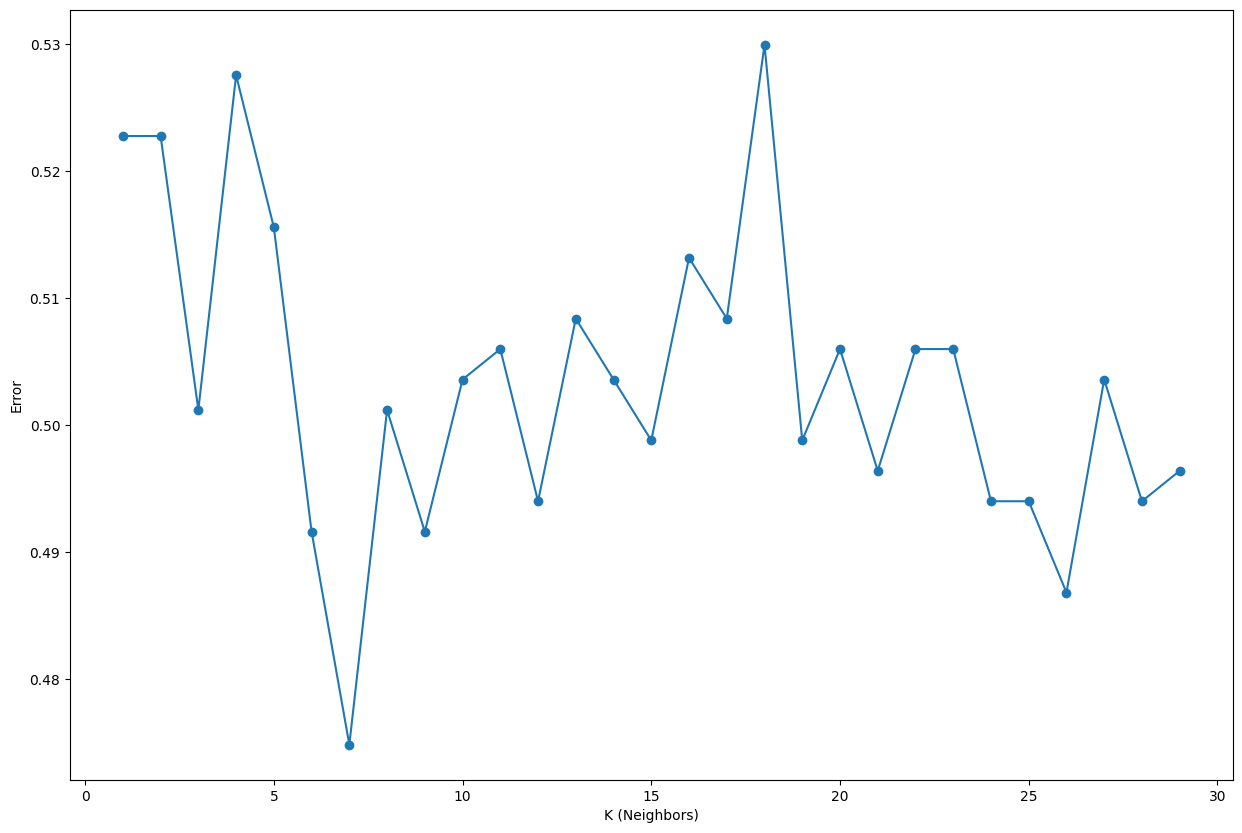

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.plot(range(k_min, k_max), errors, marker="o")
plt.xlabel("K (Neighbors)")
plt.ylabel("Error")